In [27]:
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.optimize as sp

In [28]:
Data_names = []
for (dir_path, dir_names, file_names) in os.walk('./Labday_2_measurements_2'):
    Data_names.extend(file_names)

In [29]:
Data_list = []

for i, Data_name in enumerate(Data_names):
    Data = np.loadtxt('Labday_2_measurements_2/' + Data_name, skiprows = 3)
    Data_list.append(Data)

C:\Users\hanse\AppData\Local\Temp\ipykernel_14088\3011992493.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure() #plot raw data


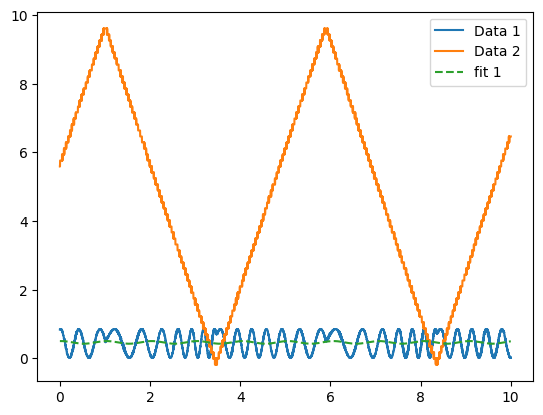

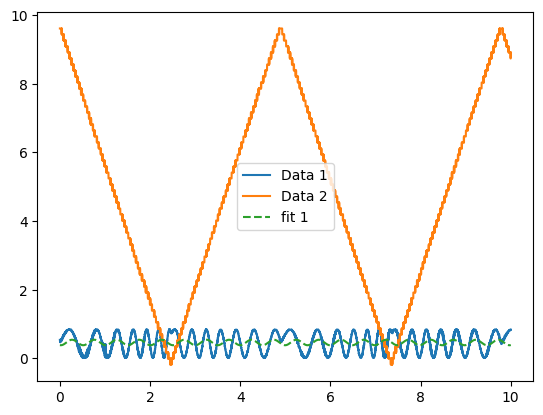

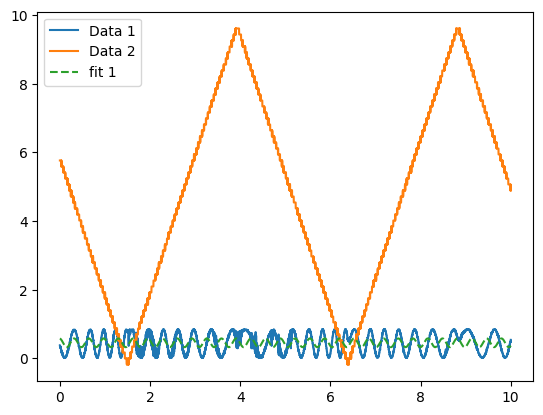

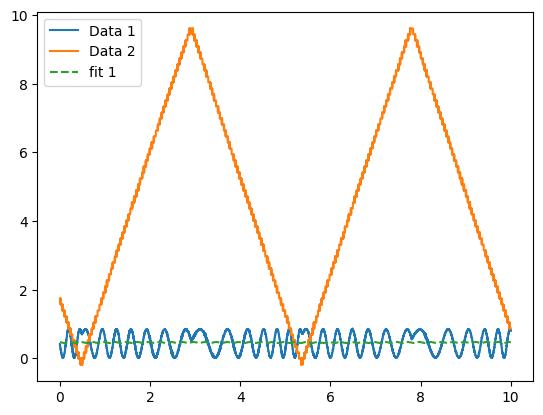

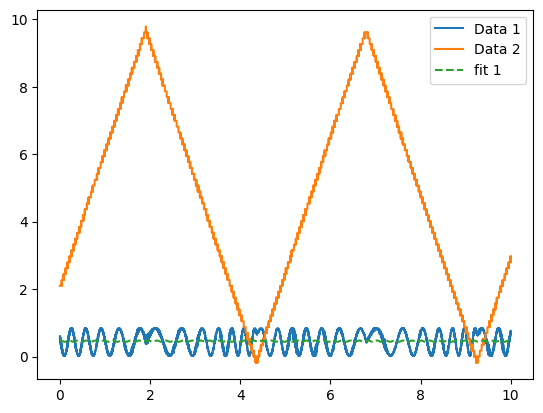

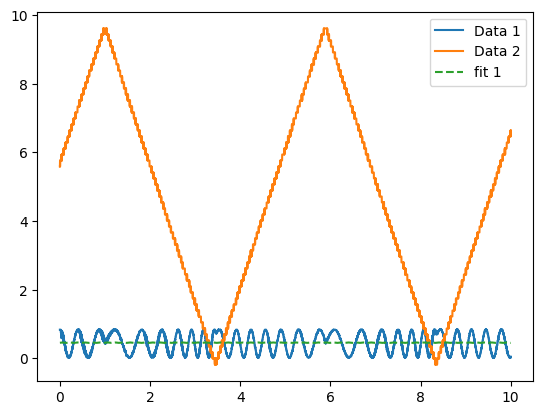

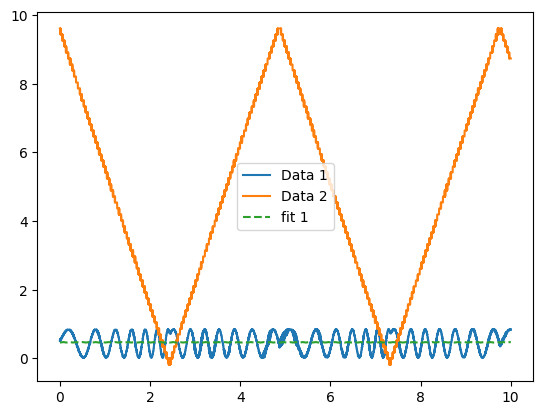

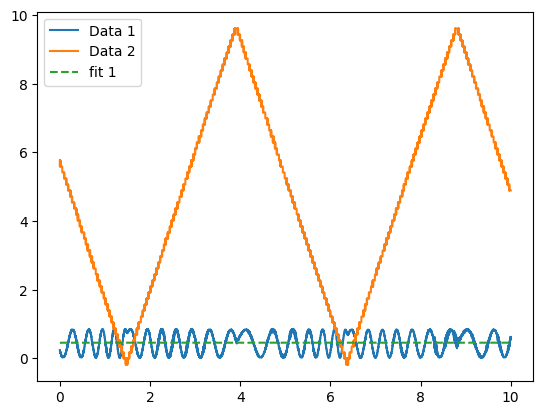

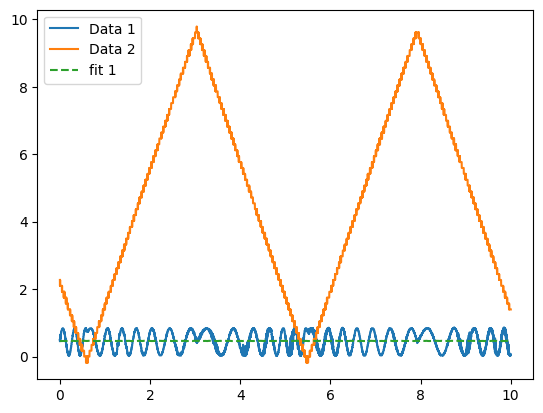

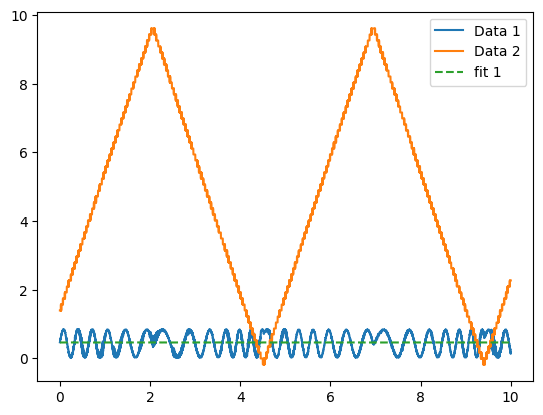

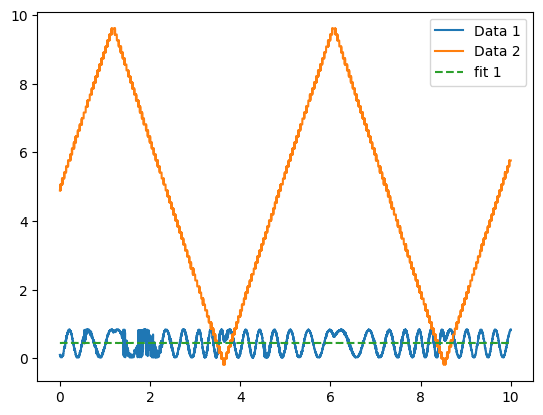

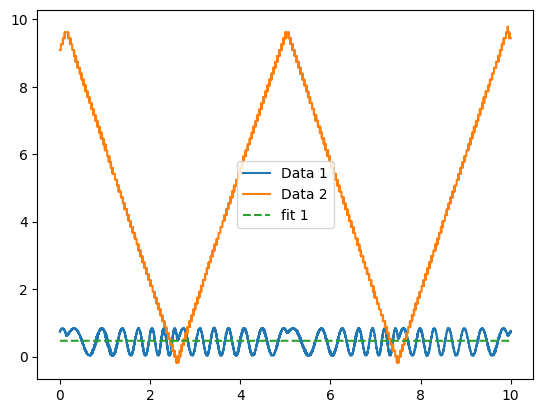

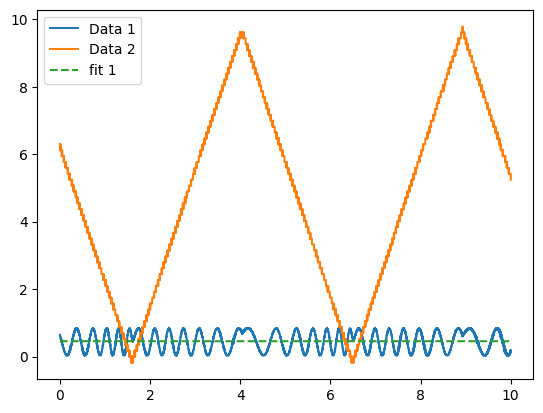

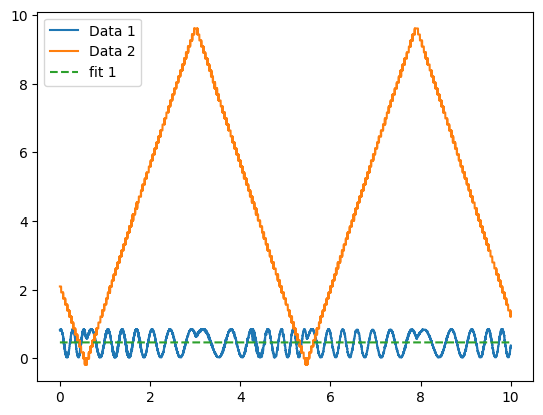

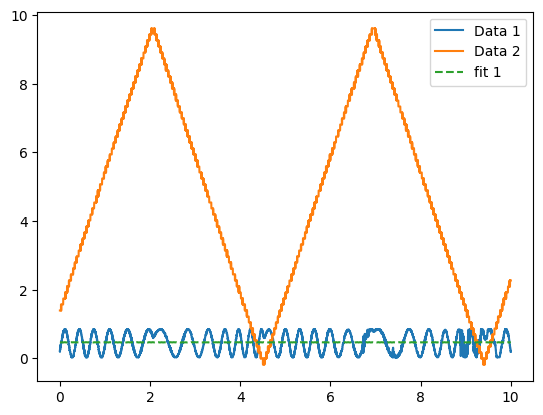

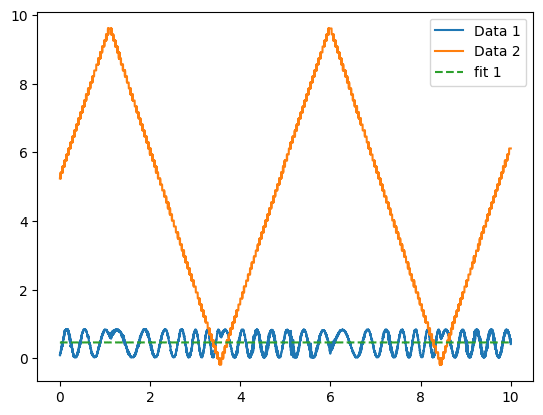

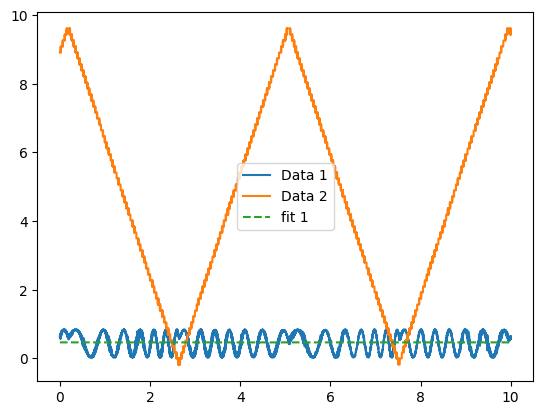

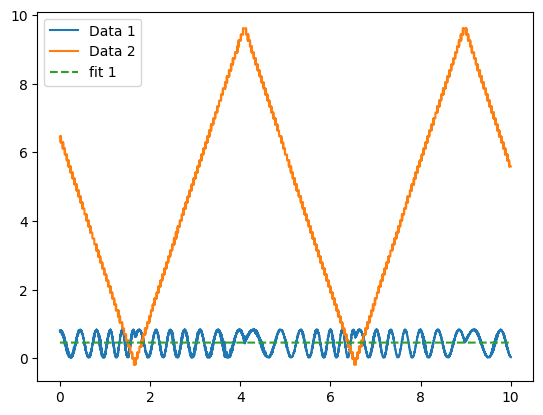

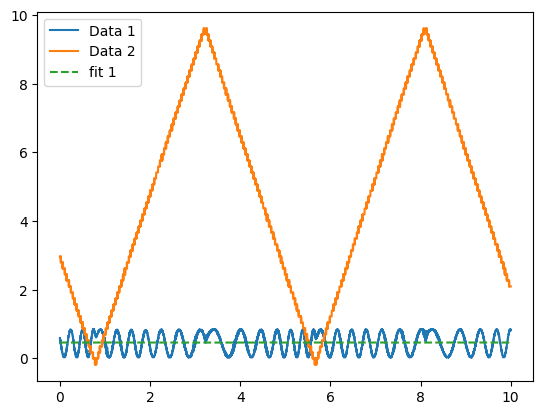

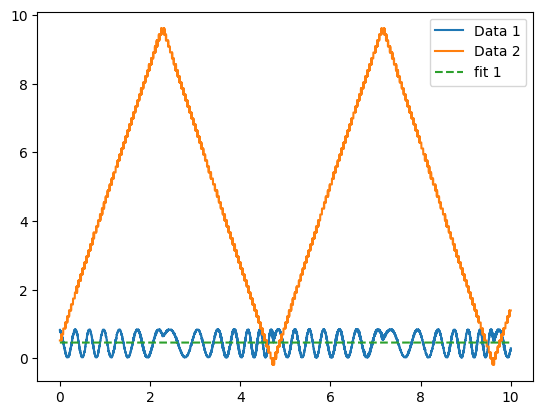

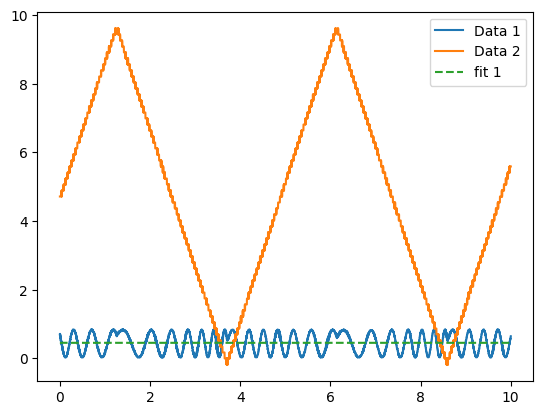

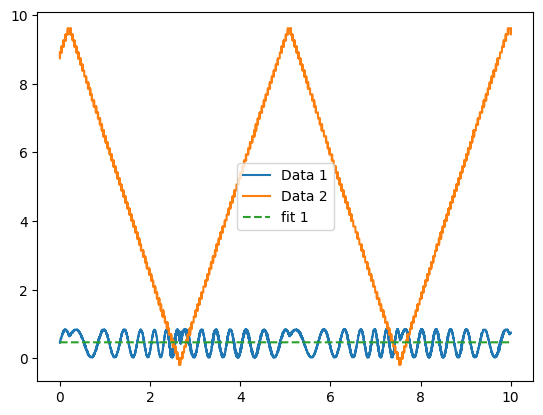

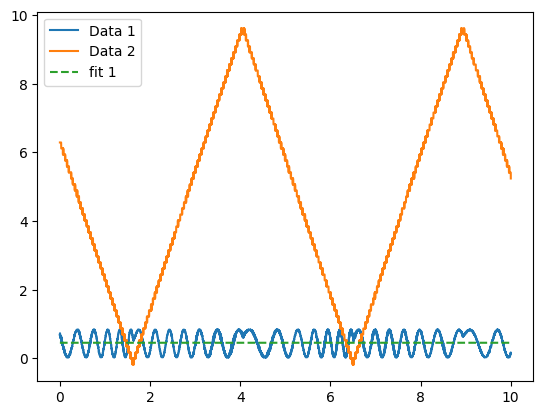

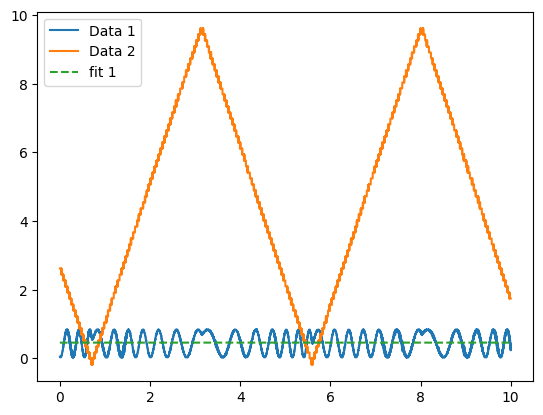

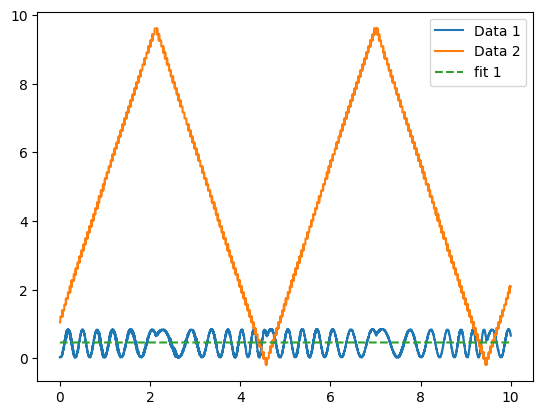

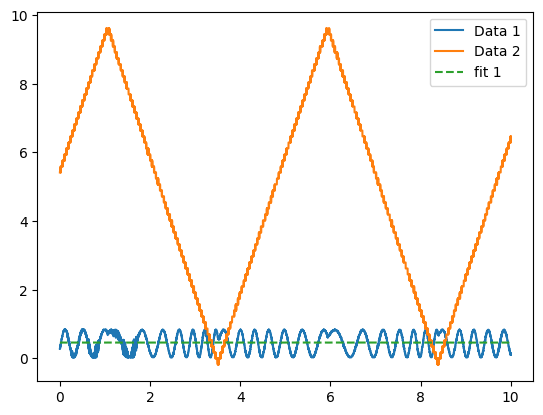

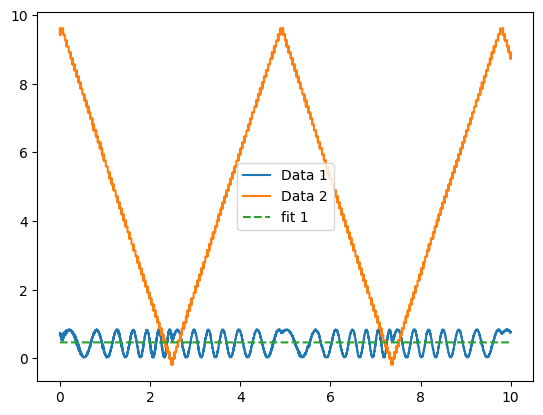

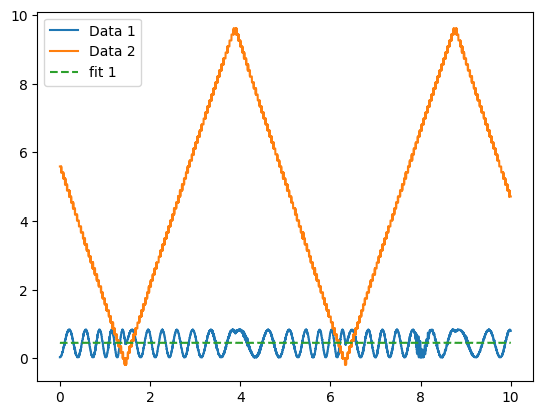

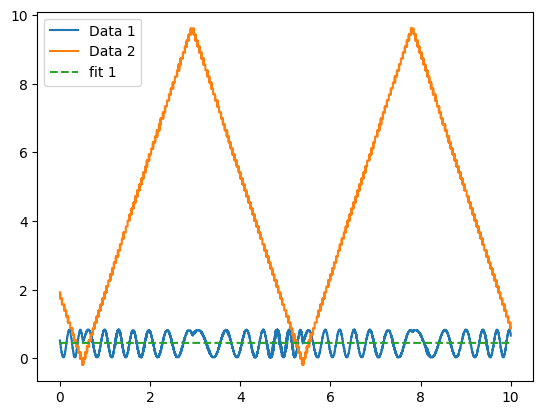

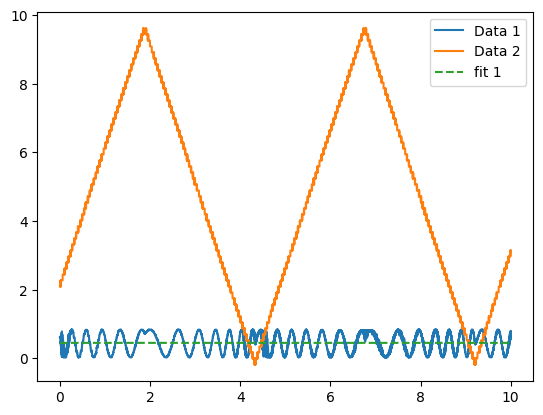

In [30]:
# Fit data to as sine function just to try something

def Sine(t,*p): #define fitting function
    A=p[0]
    w=p[1]
    phi=p[2]
    C=p[3]
    return A*np.sin(w*t+phi)+C

for Data,Data_name in zip(Data_list,Data_names):
    plt.figure() #plot raw data
    Time=Data[:,0]
    V1=Data[:,1]
    V2=Data[:,2]
    plt.plot(Time,V1, label='Data 1')
    plt.plot(Time,V2, label='Data 2')
    #plt.xlabel('Time [s]')
    #plt.ylabel('Voltage [V]')
    
    #Do fit to first sine wave, make guesses on amplitide with max(V1)-min(V1), make guess based on frequency written in Data_name float(Data_name[24:27])
    popt1, pcov1 = sp.curve_fit(Sine, Time, V1, p0=[max(V1)-min(V1),2*np.pi*float(Data_name[24:27]),0,0])
    plt.plot(Time,Sine(Time,*popt1),'--',label='fit 1')
    plt.legend()
    
    